In [43]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from config import technologies

In [44]:
df = pd.read_csv("./technologies/vacancies.csv", encoding="utf-8")
df.head()

,title,company,salary,category,publicated,description
0,Senior / Lead Technical Support Developer,ApomSolutions,NaN,"Категорія: Python,Англійська: Advanced/Fluent,...",Вакансія опублікована 30 квітня...,"As a Tier 3 Support Engineer, you will be resp..."
1,Middle Python Developer,AnyforSoft,NaN,"Категорія: Python,Англійська: Intermediate,3 р...",Вакансія опублікована 28 квітня...,Are you a skilled and passionate Python develo...
2,"Senior Software Engineer (Backend), Voice Serv...",Data Science UA,NaN,"Категорія: Python,Англійська: Upper-Intermedia...",Вакансія опублікована 28 квітня...,"We are,and we are developing a Data Science co..."
3,Senior Python Developer (English and Russian s...,SalesNash,NaN,"Категорія: Python,Англійська: Upper-Intermedia...",Вакансія опублікована 28 квітня...,We are seeking a talented Senior Full Stack De...
4,"Full Stack Developer (Python,React) Miami loca...",Global Teams,NaN,"Категорія: Python,Англійська: Advanced/Fluent,...",Вакансія опублікована 28 квітня...,We're a startup company that's revolutionizing...


In [45]:
df["experience"] = pd.Series([
    category.split(",")[-1] for category in df["category"]
])
df["language"] = [
    category.split(",")[1]
    if len(category.split(",")) == 3 else None
    for category in df["category"]
]
df["category"] = pd.Series([
    category.split(",")[0] for category in df["category"]
])

,title,company,salary,category,publicated,description,experience,language
0,Senior / Lead Technical Support Developer,ApomSolutions,NaN,Категорія: Python,Вакансія опублікована 30 квітня...,"As a Tier 3 Support Engineer, you will be resp...",5 років досвіду,Англійська: Advanced/Fluent
1,Middle Python Developer,AnyforSoft,NaN,Категорія: Python,Вакансія опублікована 28 квітня...,Are you a skilled and passionate Python develo...,3 роки досвіду,Англійська: Intermediate
2,"Senior Software Engineer (Backend), Voice Serv...",Data Science UA,NaN,Категорія: Python,Вакансія опублікована 28 квітня...,"We are,and we are developing a Data Science co...",5 років досвіду,Англійська: Upper-Intermediate
3,Senior Python Developer (English and Russian s...,SalesNash,NaN,Категорія: Python,Вакансія опублікована 28 квітня...,We are seeking a talented Senior Full Stack De...,5 років досвіду,Англійська: Upper-Intermediate
4,"Full Stack Developer (Python,React) Miami loca...",Global Teams,NaN,Категорія: Python,Вакансія опублікована 28 квітня...,We're a startup company that's revolutionizing...,5 років досвіду,Англійська: Advanced/Fluent


In [46]:
df["view"] = pd.Series([
    category.split(",")[1].split(" ")[0] for category in df["publicated"]
])
df["review"] = pd.Series([
    category.split(",")[2].split(" ")[0] for category in df["publicated"]
])
df["review"] = df.review.astype("int")
df["publicated"] = pd.Series([
    " ".join(category.split(",")[0].split(" ")[2:])
    for category in df["publicated"]
])

## 1. Technology popularity

In [47]:
tech = set([tech.lower() for tech in technologies])
df["descript"] = pd.Series(
    re.findall("[a-zA-Z]+", desc.lower()) for desc in df["description"]
)
df["technologies"] = pd.Series(
    ",".join(tech.intersection(set(desc))) for desc in df["descript"]
)
df = df.reindex(
    columns=[
        "title",
        "company",
        "salary",
        "technologies",
        "experience",
        "language",
        "publicated",
        "view",
        "review",
        "description",
        "descript",
        "category"
    ]
)
df.head()

,title,company,salary,technologies,experience,language,publicated,view,review,description,descript,category
0,Senior / Lead Technical Support Developer,ApomSolutions,NaN,"networking,python,aws,docker",5 років досвіду,Англійська: Advanced/Fluent,30 квітня 2023,1,0,"As a Tier 3 Support Engineer, you will be resp...","[as, a, tier, support, engineer, you, will, be...",Категорія: Python
1,Middle Python Developer,AnyforSoft,NaN,"rest,mongodb,python,django,docker",3 роки досвіду,Англійська: Intermediate,28 квітня 2023,56,15,Are you a skilled and passionate Python develo...,"[are, you, a, skilled, and, passionate, python...",Категорія: Python
2,"Senior Software Engineer (Backend), Voice Serv...",Data Science UA,NaN,"rest,ai",5 років досвіду,Англійська: Upper-Intermediate,28 квітня 2023,9,0,"We are,and we are developing a Data Science co...","[we, are, and, we, are, developing, a, data, s...",Категорія: Python
3,Senior Python Developer (English and Russian s...,SalesNash,NaN,"flask,python,react,aws",5 років досвіду,Англійська: Upper-Intermediate,28 квітня 2023,40,8,We are seeking a talented Senior Full Stack De...,"[we, are, seeking, a, talented, senior, full, ...",Категорія: Python
4,"Full Stack Developer (Python,React) Miami loca...",Global Teams,NaN,"react,sql,mongodb,git,python,django,postgresql...",5 років досвіду,Англійська: Advanced/Fluent,28 квітня 2023,27,5,We're a startup company that's revolutionizing...,"[we, re, a, startup, company, that, s, revolut...",Категорія: Python


In [49]:
tech_ll = [tt for tt in df["technologies"]]
tech_ll.remove("")
tech_list = ",".join(tech_ll).split(",")
tech_set = list(set(tech_list))
tech_series = pd.Series(tech_list, name="tech")

In [50]:
tf = tech_series.to_frame()
tf_count = tf.groupby(by="tech")["tech"].count().to_frame(name="number")
tf_count.sort_values(by="number", ascending=False, inplace=True)

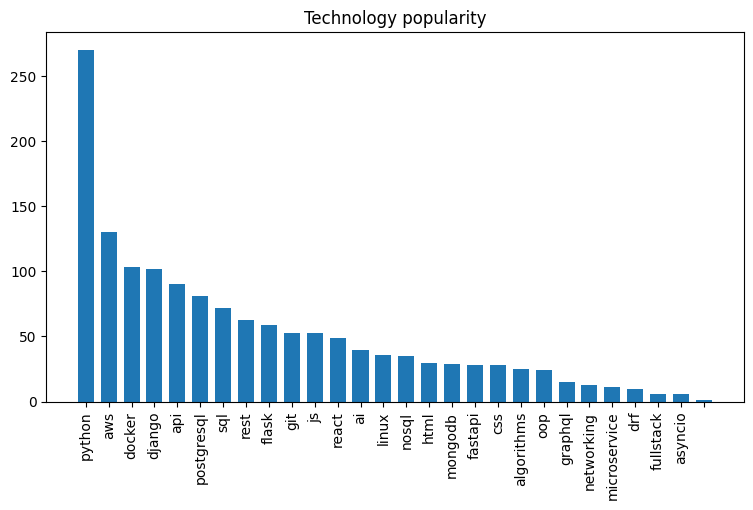

In [23]:
number = tf_count["number"].to_list()
technologies = tf_count.index.to_list()
fig, ax = plt.subplots()
fig.set_figwidth(9)
ax.bar(technologies, number, width=0.7)
ax.set_title("Technology popularity")
plt.xticks(rotation=90)
plt.show()

## 2. Vacancies for levels of developers

In [51]:
dflev = pd.DataFrame(index=df.index)
dflev["level"] = pd.Series([re.findall("[a-zA-Z]+", str(s).lower()) for s in df.title])
for i in range(dflev.shape[0]):
    for ll in dflev.loc[i]:
        flag = True
        for w in ll:
            if w in ("junior", "middle", "senior"):
                dflev.loc[i] = w
                flag = False
        if flag:
            dflev.loc[i] = "none level"
level = dflev.groupby("level")["level"].count().sort_values(ascending=False)
level

level
none level    132
senior        113
middle         35
junior          6
Name: level, dtype: int64

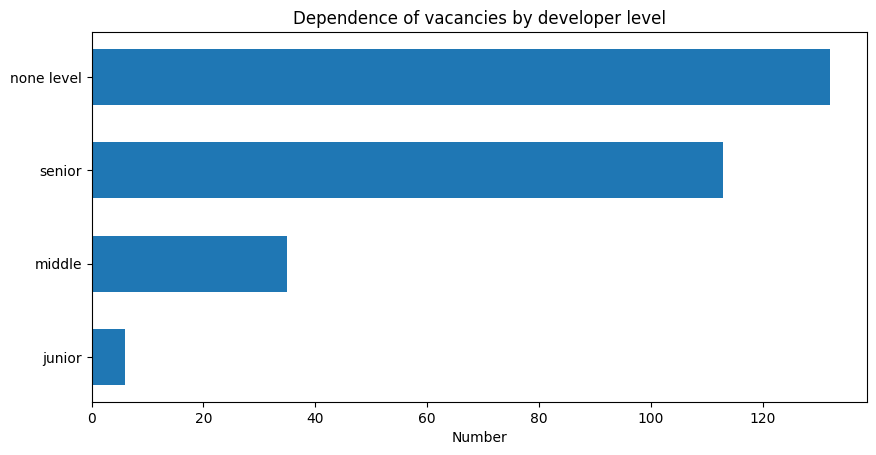

In [27]:
x_level = level.index
y_count = level.values
fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.barh(x_level, y_count, height=0.6)
ax.invert_yaxis()
ax.set_xlabel("Number")
ax.set_title("Dependence of vacancies by developer level")
plt.show()

## 3. Dependence of vacancies by experience

In [52]:
ech_ll = [tt for tt in df["technologies"]]
tech_ll.remove("")
tech_list = ",".join(tech_ll).split(",")
tech_set = list(set(tech_list))
tech_series = pd.Series(tech_list, name="tech")
tf = tech_series.to_frame()
tf_count = tf.groupby(by="tech")["tech"].count().to_frame(name="number")
tf_count.sort_values(by="number", ascending=False, inplace=True)

In [53]:
dfl = pd.DataFrame(index=df.index)
dfl["title"] = df["title"]
dfl["experience"] = df["experience"]
dfl.head()

,title,experience
0,Senior / Lead Technical Support Developer,5 років досвіду
1,Middle Python Developer,3 роки досвіду
2,"Senior Software Engineer (Backend), Voice Serv...",5 років досвіду
3,Senior Python Developer (English and Russian s...,5 років досвіду
4,"Full Stack Developer (Python,React) Miami loca...",5 років досвіду


(-1.099998402638974,
 1.0999999239351892,
 -1.0999999775712075,
 1.0999995289953586)

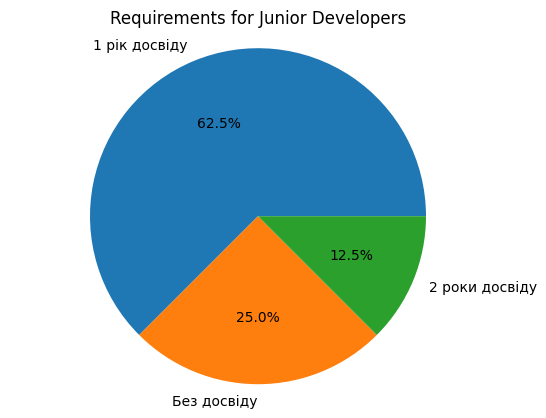

In [55]:
df_junior = dfl[dfl["title"].str.contains("unior")]
df_experience = (
    df_junior.groupby(["experience"])["experience"]
    .count()
    .nlargest(10, keep="first")
    .rename("count")
)
vals = df_experience.to_list()
labels = df_experience.index.to_list()
fig, ax = plt.subplots()
ax.set_title("Requirements for Junior Developers")
ax.pie(vals, labels=labels, autopct="%1.1f%%")
ax.axis("equal")

(-1.099999318213805,
 1.0999999675339907,
 -1.0999999623338412,
 1.0999997335258507)

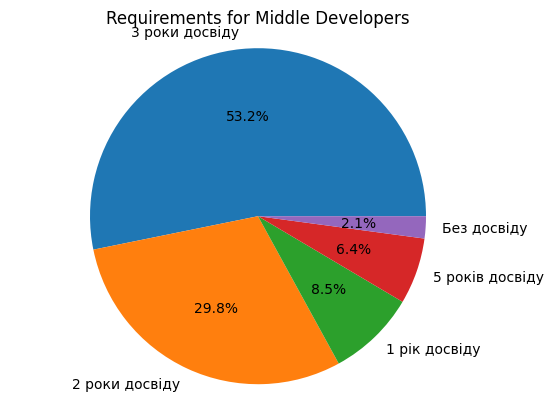

In [57]:
df_middle = dfl[dfl["title"].str.contains("iddle")]
df_experience = (
    df_middle.groupby(["experience"])["experience"]
    .count()
    .nlargest(10, keep="first")
    .rename("count")
)
vals = df_experience.to_list()
labels = df_experience.index.to_list()

fig, ax = plt.subplots()
ax.set_title("Requirements for Middle Developers")
ax.pie(vals, labels=labels, autopct="%1.1f%%")
ax.axis("equal")

(-1.1, 1.1, -1.0999999504692983, 1.0999999976413952)

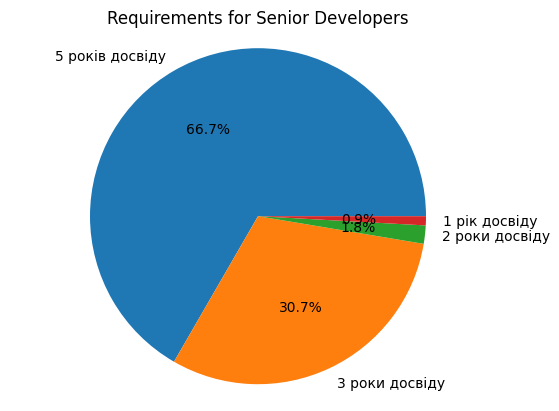

In [59]:
df_senior = dfl[dfl["title"].str.contains("enior")]
df_experience = (
    df_senior.groupby(["experience"])["experience"]
    .count()
    .nlargest(10, keep="first")
    .rename("count")
)
vals = df_experience.to_list()
labels = df_experience.index.to_list()

fig, ax = plt.subplots()
ax.set_title("Requirements for Senior Developers")
ax.pie(vals, labels=labels, autopct="%1.1f%%")
ax.axis("equal")

(-1.0999999920386432,
 1.0999999996208878,
 -1.099999400718504,
 1.0999990397601414)

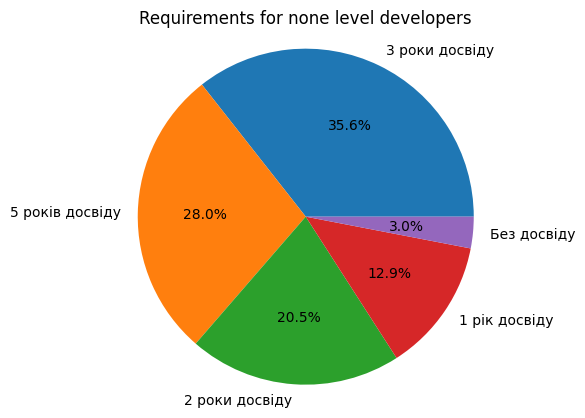

In [60]:
df_notlevel = dfl[
    ~dfl["title"].str.contains("unior")
    & ~dfl["title"].str.contains("iddle")
    & ~dfl["title"].str.contains("enior")
]
df_notlevel.head(10)
df_experience = (
    df_notlevel.groupby(["experience"])["experience"]
    .count()
    .nlargest(10, keep="first")
    .rename("count")
)
vals = df_experience.to_list()
labels = df_experience.index.to_list()

fig, ax = plt.subplots()
ax.set_title("Requirements for none level developers")
ax.pie(vals, labels=labels, autopct="%1.1f%%")
ax.axis("equal")